<a href="https://colab.research.google.com/github/Dhaarani13/Project/blob/main/mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm  # Progress bar for large datasets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

100%|██████████| 1.03G/1.03G [00:06<00:00, 170MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [3]:
0# Listing the directories in the path in a list

dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1"
print("Dataset files:", os.listdir(dataset_path))

Dataset files: ['asl_alphabet_test', 'asl_alphabet_train']


In [4]:
# Listing the classes in asl_alphabet_train

train_path = os.path.join(dataset_path, "asl_alphabet_train" , "asl_alphabet_train")
classes = os.listdir(train_path)

print("Classes in dataset:", classes)
print("Total classes:", len(classes))

Classes in dataset: ['J', 'W', 'V', 'U', 'Z', 'T', 'del', 'E', 'P', 'nothing', 'G', 'L', 'F', 'I', 'R', 'S', 'O', 'X', 'B', 'D', 'N', 'Y', 'C', 'A', 'H', 'Q', 'K', 'space', 'M']
Total classes: 29


In [5]:
# Listing the classes in asl_alphabet_test

train_path = os.path.join(dataset_path, "asl_alphabet_test" , "asl_alphabet_test")
clas = os.listdir(train_path)

print("Classes in dataset:", clas)
print("Total classes:", len(clas))

Classes in dataset: ['K_test.jpg', 'space_test.jpg', 'I_test.jpg', 'J_test.jpg', 'O_test.jpg', 'R_test.jpg', 'M_test.jpg', 'Z_test.jpg', 'V_test.jpg', 'L_test.jpg', 'D_test.jpg', 'Q_test.jpg', 'E_test.jpg', 'nothing_test.jpg', 'G_test.jpg', 'Y_test.jpg', 'C_test.jpg', 'P_test.jpg', 'F_test.jpg', 'U_test.jpg', 'X_test.jpg', 'S_test.jpg', 'B_test.jpg', 'H_test.jpg', 'W_test.jpg', 'A_test.jpg', 'N_test.jpg', 'T_test.jpg']
Total classes: 28


/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/P/P807.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/W/W1990.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/E/E2882.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/X/X791.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/F/F2453.jpg


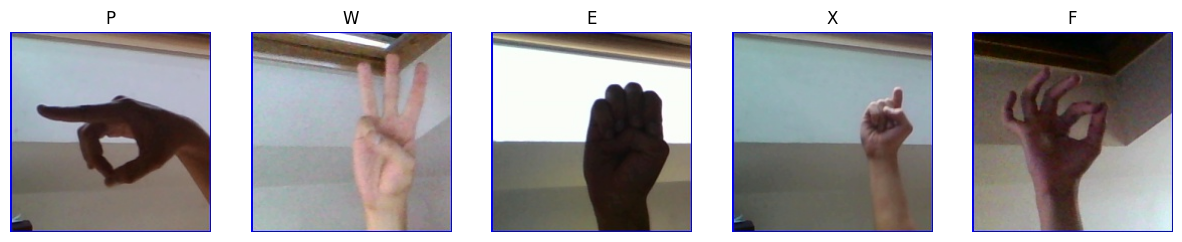

In [6]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train"
#Calling the function
show_sample_images(dataset_path)

In [7]:

# Define paths
input_dir = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/"
output_dir = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Create output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Set target image size
IMG_SIZE = (100, 100)

# Function to preprocess images
def preprocess_images(input_dir, output_dir):
    for category in tqdm(os.listdir(input_dir)):  # Loop through A-Z, 0-9, etc.
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.isdir(category_path):
            continue  # Skip if it's not a directory

        os.makedirs(output_category_path, exist_ok=True)  # Create category folder in output

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Load image

            if img is None:
                continue  # Skip unreadable images

            img = cv2.resize(img, IMG_SIZE)  # Resize to 50x50
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

            # Apply binary thresholding (adaptive for better hand detection)
            _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

            # Normalize pixel values (convert to float between 0 and 1)
            img_normalized = img_thresh / 255.0

            # Save preprocessed image
            save_path = os.path.join(output_category_path, img_name)
            cv2.imwrite(save_path, (img_normalized * 255).astype(np.uint8))  # Convert back to uint8

# Run preprocessing
preprocess_images(input_dir, output_dir)

print("Preprocessing completed. Saved in:", output_dir)



100%|██████████| 29/29 [00:58<00:00,  2.02s/it]

Preprocessing completed. Saved in: /root/.cache/kagglehub/datasets/processed_asl_alphabet/


In [8]:
preprocessed = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
print("Dataset files:", os.listdir(preprocessed))

Dataset files: ['J', 'W', 'V', 'U', 'Z', 'T', 'del', 'E', 'P', 'nothing', 'G', 'L', 'F', 'I', 'R', 'S', 'O', 'X', 'B', 'D', 'N', 'Y', 'C', 'A', 'H', 'Q', 'K', 'space', 'M']


/root/.cache/kagglehub/datasets/processed_asl_alphabet/O/O1125.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/B/B1919.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/K/K998.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/C/C2689.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/J/J1568.jpg


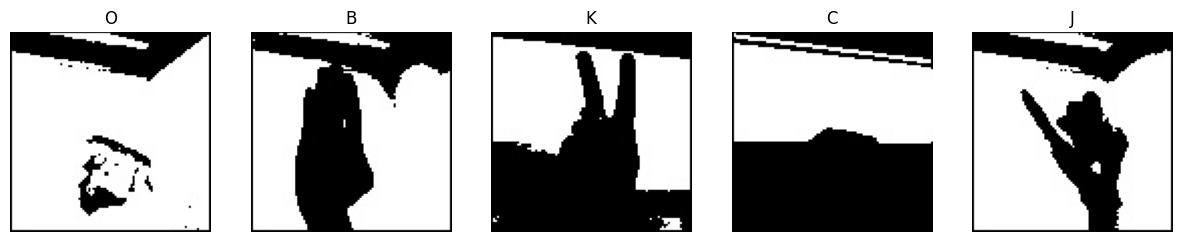

In [9]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
#Calling the function
show_sample_images(dataset_path)

In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
IMG_SIZE = 150
NUM_CLASSES = 29
BATCH_SIZE = 8

# Aggressive data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.5,
    height_shift_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    validation_split=0.3
)

# Load dataset dynamically
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Reduce dataset size to control accuracy
train_generator.samples = int(train_generator.samples * 0.75)  # Reduce to slow learning

# Load Pretrained MobileNetV2 (simpler model)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add classifier head with Extreme Dropout & L2 Regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.02))(x)  # Reduce layer complexity
x = Dropout(0.6)(x)  # High dropout
x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile model with low learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Train model for 10 epochs
EPOCHS = 10
model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

# Save model
model.save("sign_language_mobilenetv2_75_accuracy_10epochs.h5")

print("Model training complete and saved as 'sign_language_mobilenetv2_75_accuracy_10epochs.h5' 🎉")


Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


<ipython-input-10-5d5250d2e78a>:48: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7613/7613 ━━━━━━━━━━━━━━━━━━━━ 704s 86ms/step - accuracy: 0.1568 - loss: 6.3377 - val_accuracy: 0.3921 - val_loss: 2.5746
Epoch 2/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 665s 87ms/step - accuracy: 0.4650 - loss: 2.0667 - val_accuracy: 0.4264 - val_loss: 2.3181
Epoch 3/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 624s 82ms/step - accuracy: 0.5513 - loss: 1.7167 - val_accuracy: 0.4712 - val_loss: 2.3822
Epoch 4/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 618s 81ms/step - accuracy: 0.5932 - loss: 1.5541 - val_accuracy: 0.4704 - val_loss: 2.3616
Epoch 5/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 617s 81ms/step - accuracy: 0.6243 - loss: 1.4388 - val_accuracy: 0.4925 - val_loss: 2.3427
Epoch 6/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 620s 81ms/step - accuracy: 0.6414 - loss: 1.3719 - val_accuracy: 0.5006 - val_loss: 2.1141
Epoch 7/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 619s 81ms/step - accuracy: 0.6641 - loss: 1.2941 - val_accuracy: 0.4787 - val_loss: 2.3456
Epoch 8/10
7613/7613 ━━━━━━━━━━━━━━━━━━━━ 617s 81ms/step - accuracy: 0.6779 - lo

Model training complete and saved as 'sign_language_mobilenetv2_75_accuracy_10epochs.h5' 🎉
